In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [ ]:
data = pd.read_excel('/content/Airline_Delay_Cause.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24518 entries, 0 to 24517
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 24518 non-null  int64  
 1   month                24518 non-null  int64  
 2   carrier              24518 non-null  object 
 3   carrier_name         24518 non-null  object 
 4   airport              24518 non-null  object 
 5   airport_name         24518 non-null  object 
 6   arr_flights          24468 non-null  float64
 7   arr_del15            24459 non-null  float64
 8   carrier_ct           24468 non-null  float64
 9   weather_ct           24468 non-null  float64
 10  nas_ct               24468 non-null  float64
 11  security_ct          24468 non-null  float64
 12  late_aircraft_ct     24468 non-null  float64
 13  arr_cancelled        24468 non-null  float64
 14  arr_diverted         24468 non-null  float64
 15  arr_delay            24468 non-null 

In [ ]:
# prompt: find null values

data.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

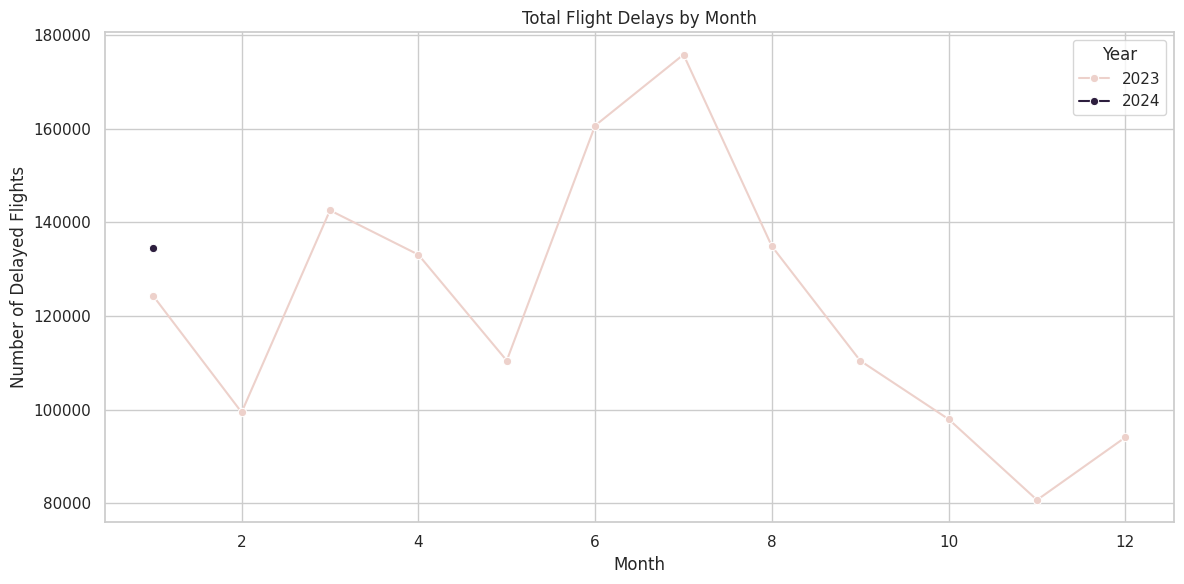

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Aggregate data for the overall flight delays over time
monthly_delays = data.groupby(['year', 'month'])['arr_del15'].sum().reset_index()

# Create a line plot for overall flight delays over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delays, x='month', y='arr_del15', hue='year', marker='o')
plt.title('Total Flight Delays by Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

<ipython-input-8-7bf15b940afc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=delay_causes.melt(id_vars=['year', 'month'], var_name='Delay Cause', value_name='Count'),


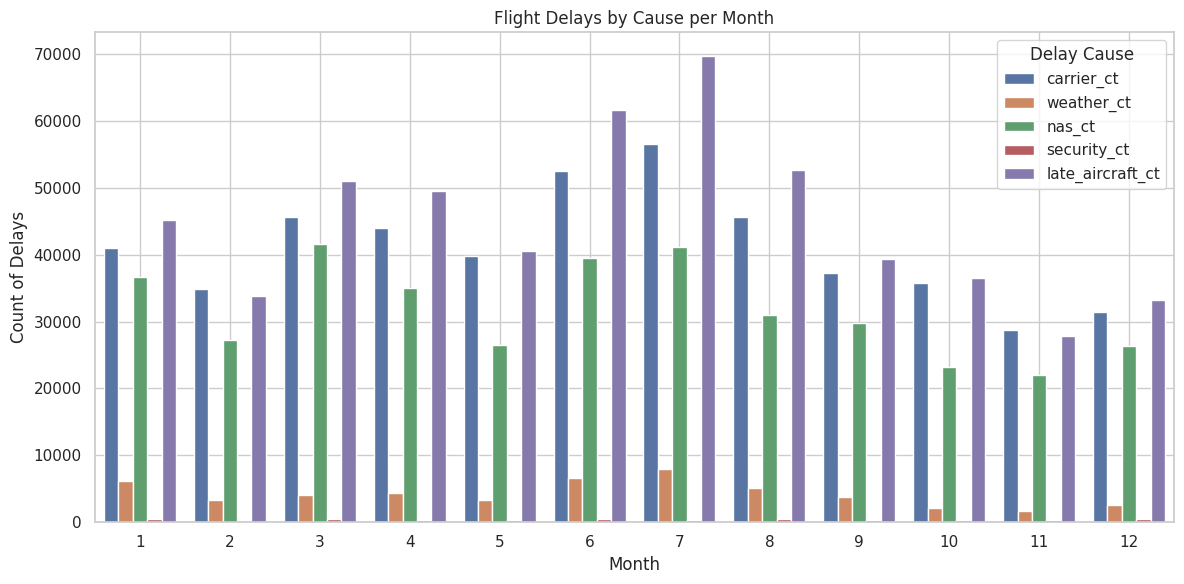

In [ ]:
# Aggregate data for delays by cause
delay_causes = data.groupby(['year', 'month']).sum()[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].reset_index()

# Create a stacked bar chart for delays by cause
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_causes.melt(id_vars=['year', 'month'], var_name='Delay Cause', value_name='Count'),
            x='month', y='Count', hue='Delay Cause', ci=None)
plt.title('Flight Delays by Cause per Month')
plt.xlabel('Month')
plt.ylabel('Count of Delays')
plt.legend(title='Delay Cause')
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
# Aggregate data to get total delays for each airport and sort them from most to least delayed
all_airport_delays = data.groupby('airport_name')['arr_del15'].sum().sort_values(ascending=False).reset_index()

all_airport_delays


airport_name  arr_del15
0                     Denver, CO: Denver International    67596.0
1    Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...    67443.0
2            Chicago, IL: Chicago O'Hare International    62804.0
3    Atlanta, GA: Hartsfield-Jackson Atlanta Intern...    61114.0
4              Las Vegas, NV: Harry Reid International    52240.0
..                                                 ...        ...
357                  St. Cloud, MN: St. Cloud Regional       11.0
358                              Adak Island, AK: Adak       10.0
359   Owensboro, KY: Owensboro Daviess County Regional        7.0
360                     Gustavus, AK: Gustavus Airport        5.0
361                        Pueblo, CO: Pueblo Memorial        3.0

[362 rows x 2 columns]

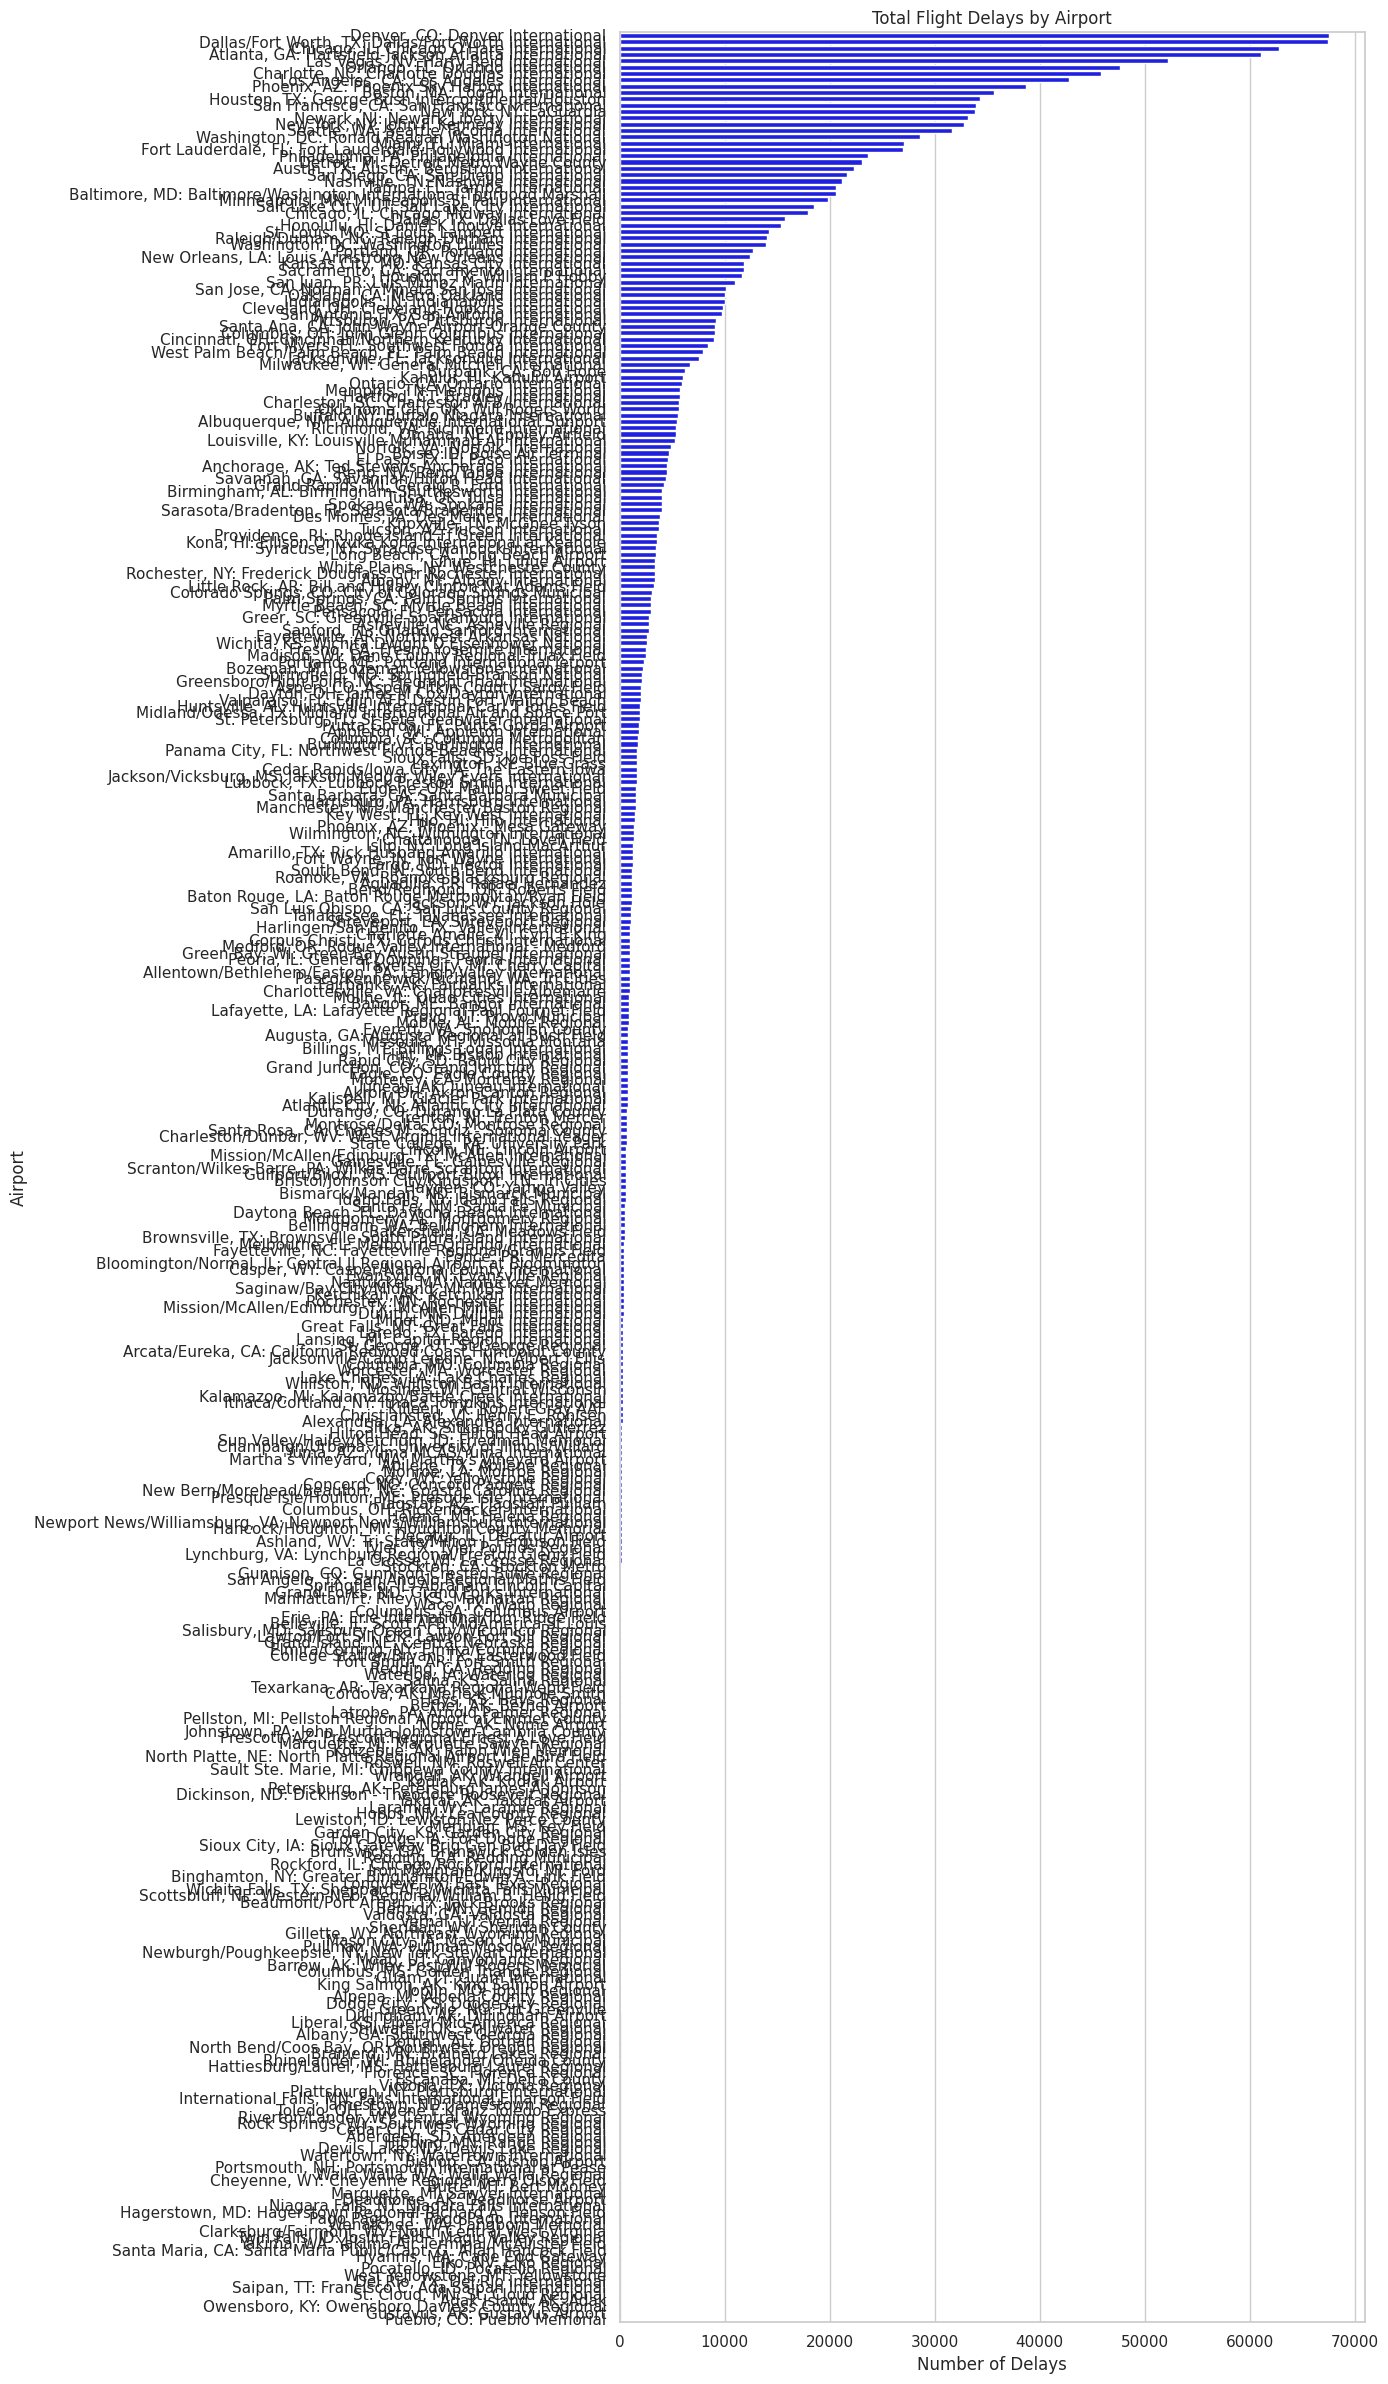

In [ ]:
# Create a bar chart for all airports showing the number of delays
plt.figure(figsize=(14, 24))
sns.barplot(data=all_airport_delays, y='airport_name', x='arr_del15', color='blue')
plt.title('Total Flight Delays by Airport')
plt.xlabel('Number of Delays')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()


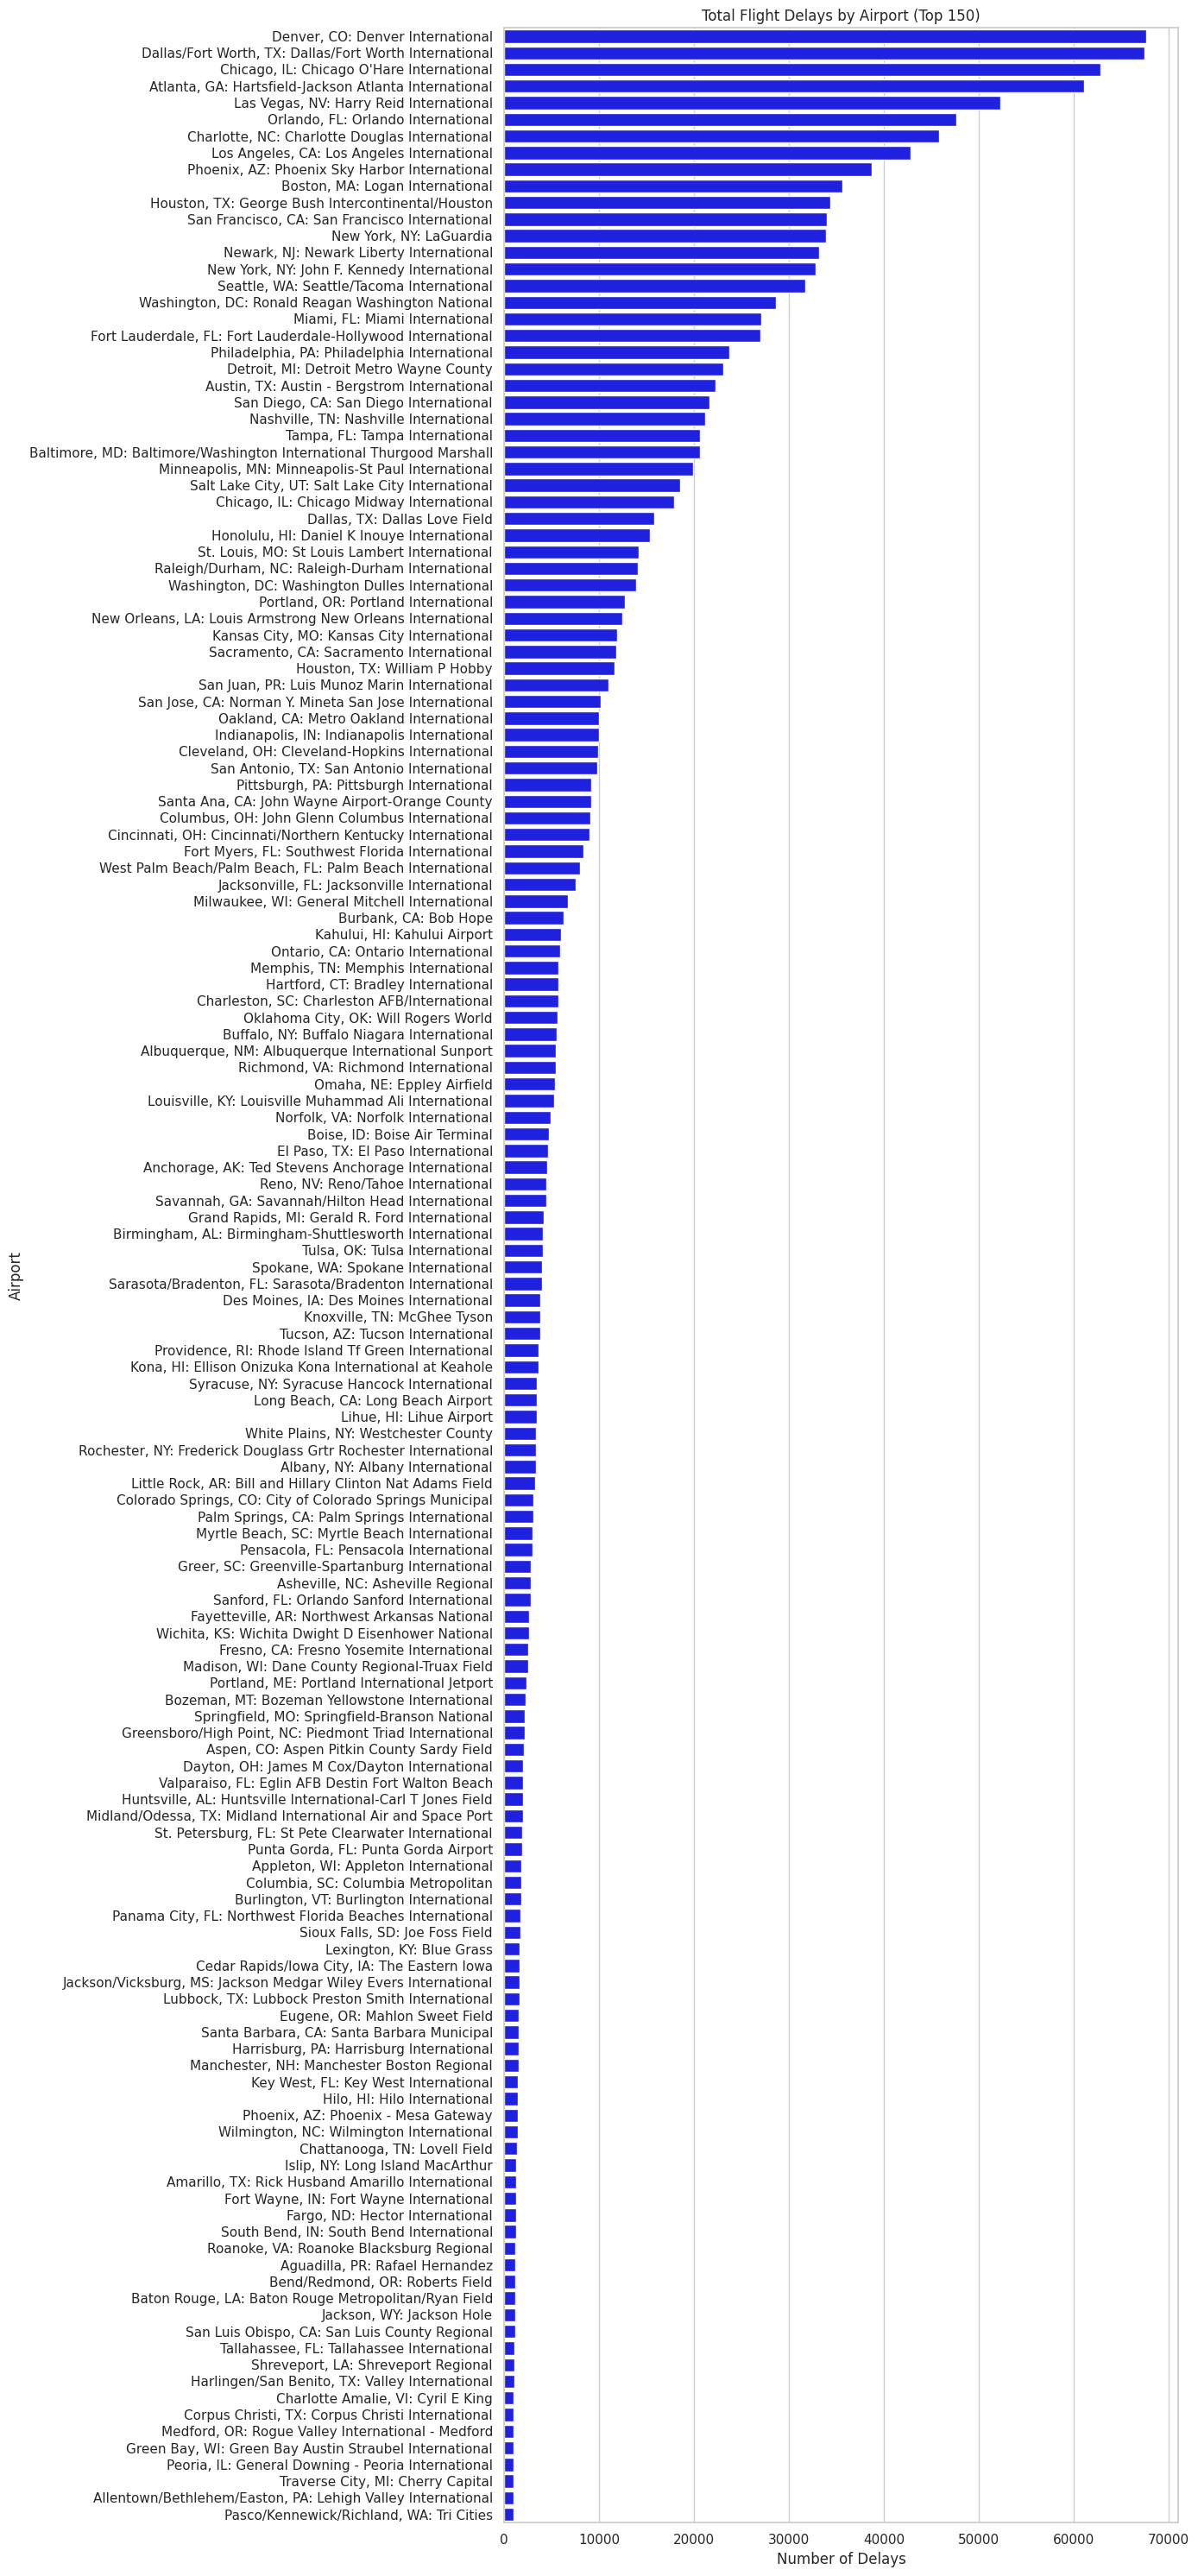

In [ ]:
# Filter to top 150 airports for a more comprehensive overview
top_150_airport_delays = all_airport_delays.head(150)

# Create a bar chart for the top 150 airports showing the number of delays
plt.figure(figsize=(14, 30))
sns.barplot(data=top_150_airport_delays, y='airport_name', x='arr_del15', color='blue')
plt.title('Total Flight Delays by Airport (Top 150)')
plt.xlabel('Number of Delays')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()


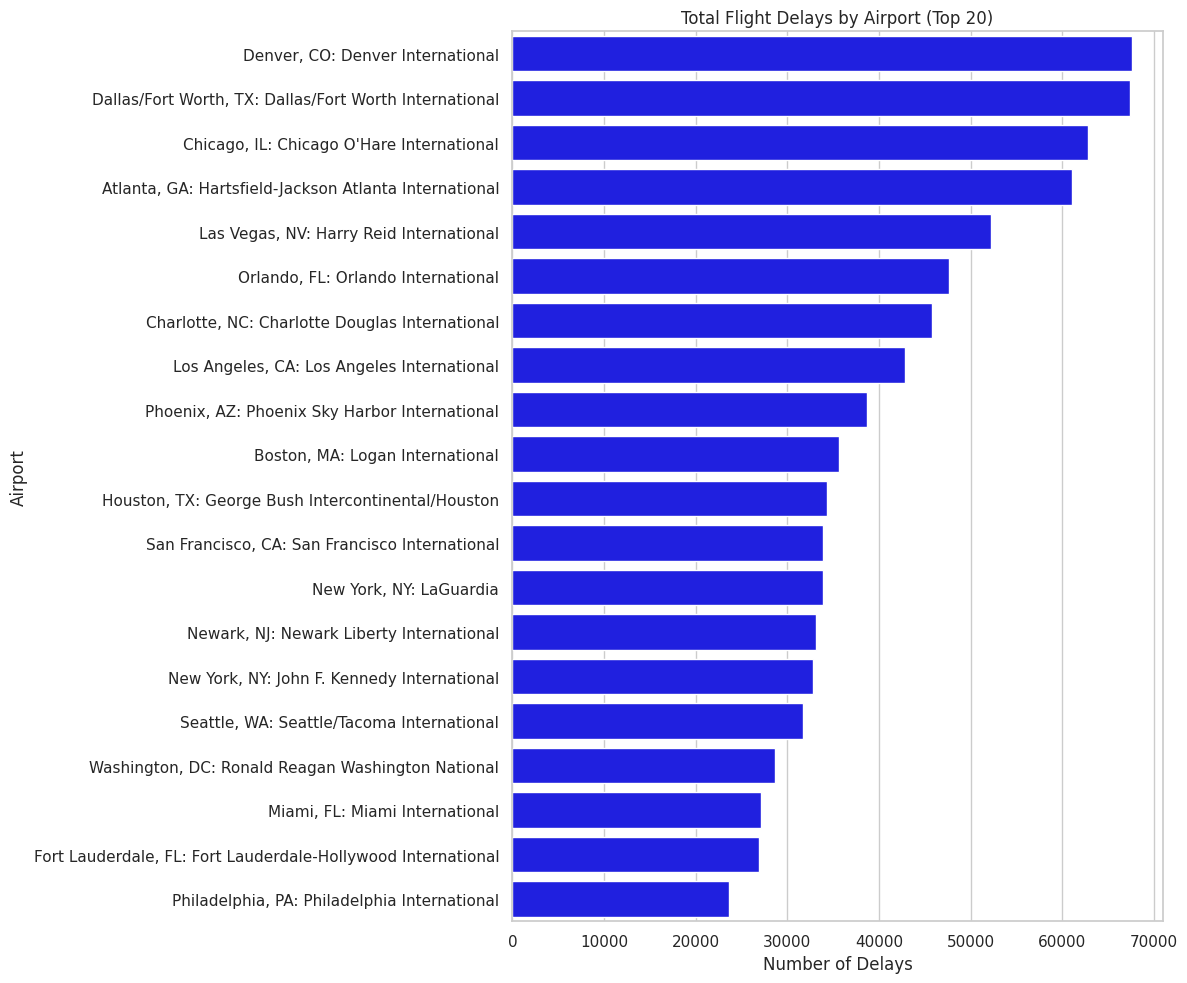

In [ ]:
# Filter to top 20 airports for a focused overview
top_20_airport_delays = all_airport_delays.head(20)

# Create a bar chart for the top 20 airports showing the number of delays
plt.figure(figsize=(12, 10))
sns.barplot(data=top_20_airport_delays, y='airport_name', x='arr_del15', color='blue')
plt.title('Total Flight Delays by Airport (Top 20)')
plt.xlabel('Number of Delays')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()


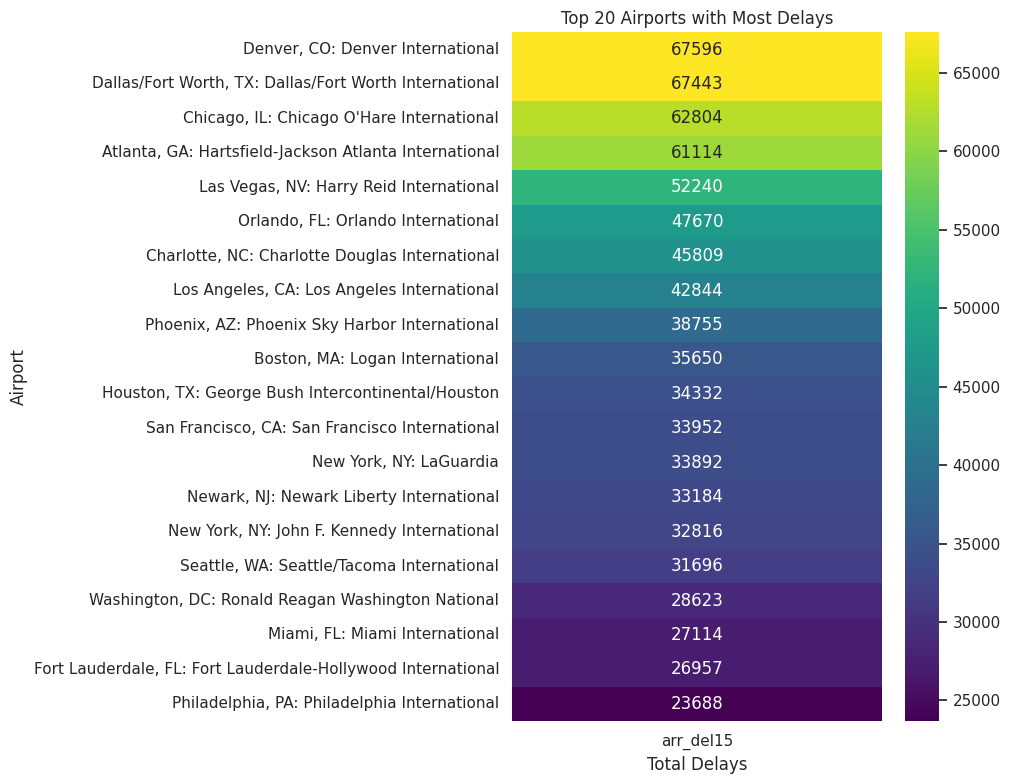

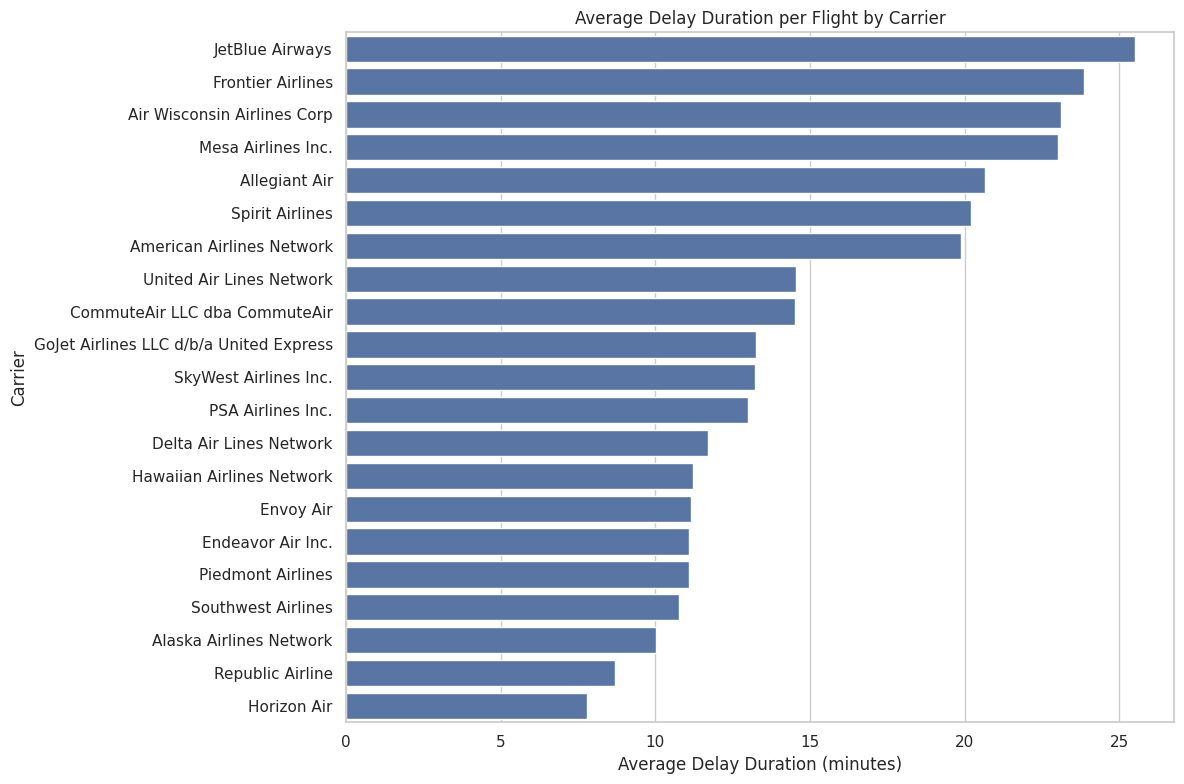

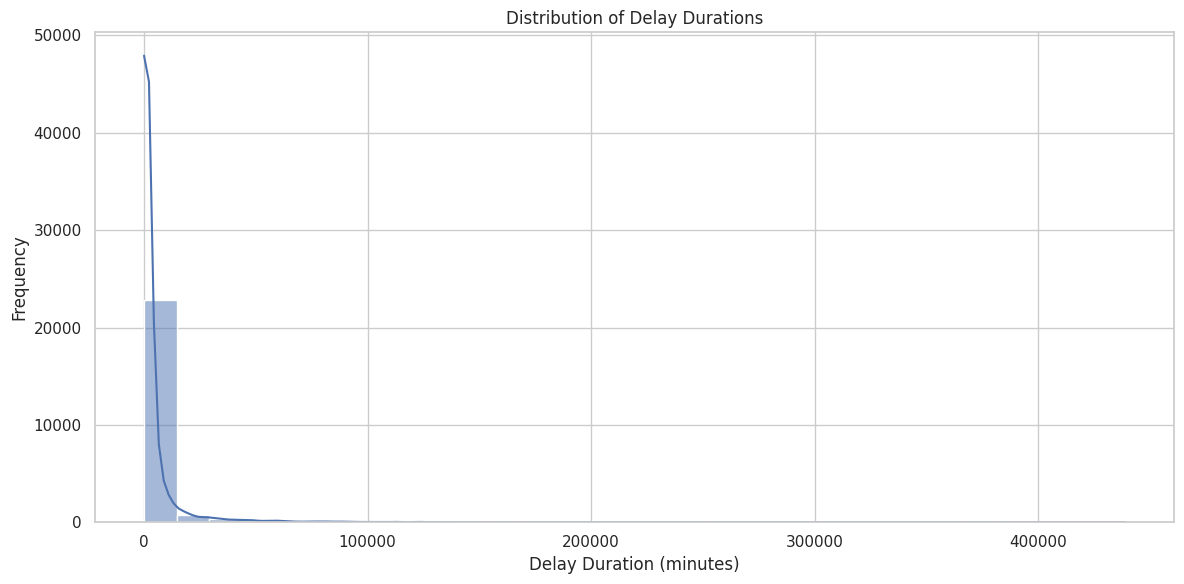

In [ ]:
# Aggregate data for airport-specific delays
airport_delays = data.groupby('airport_name')['arr_del15'].sum().sort_values(ascending=False).head(20)

# Create a heatmap for airport-specific delays
plt.figure(figsize=(10, 8))
sns.heatmap(airport_delays.to_frame(), annot=True, fmt="g", cmap='viridis')
plt.title('Top 20 Airports with Most Delays')
plt.xlabel('Total Delays')
plt.ylabel('Airport')
plt.tight_layout()

# Aggregate data for carrier performance
carrier_performance = data.groupby('carrier_name').apply(lambda x: (x['arr_delay'].sum() / x['arr_flights'].sum())).reset_index(name='Avg Delay per Flight')

# Create a bar chart for carrier performance
plt.figure(figsize=(12, 8))
sns.barplot(data=carrier_performance.sort_values('Avg Delay per Flight', ascending=False), x='Avg Delay per Flight', y='carrier_name')
plt.title('Average Delay Duration per Flight by Carrier')
plt.xlabel('Average Delay Duration (minutes)')
plt.ylabel('Carrier')
plt.tight_layout()

# Create a histogram for delay duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='arr_delay', bins=30, kde=True)
plt.title('Distribution of Delay Durations')
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()


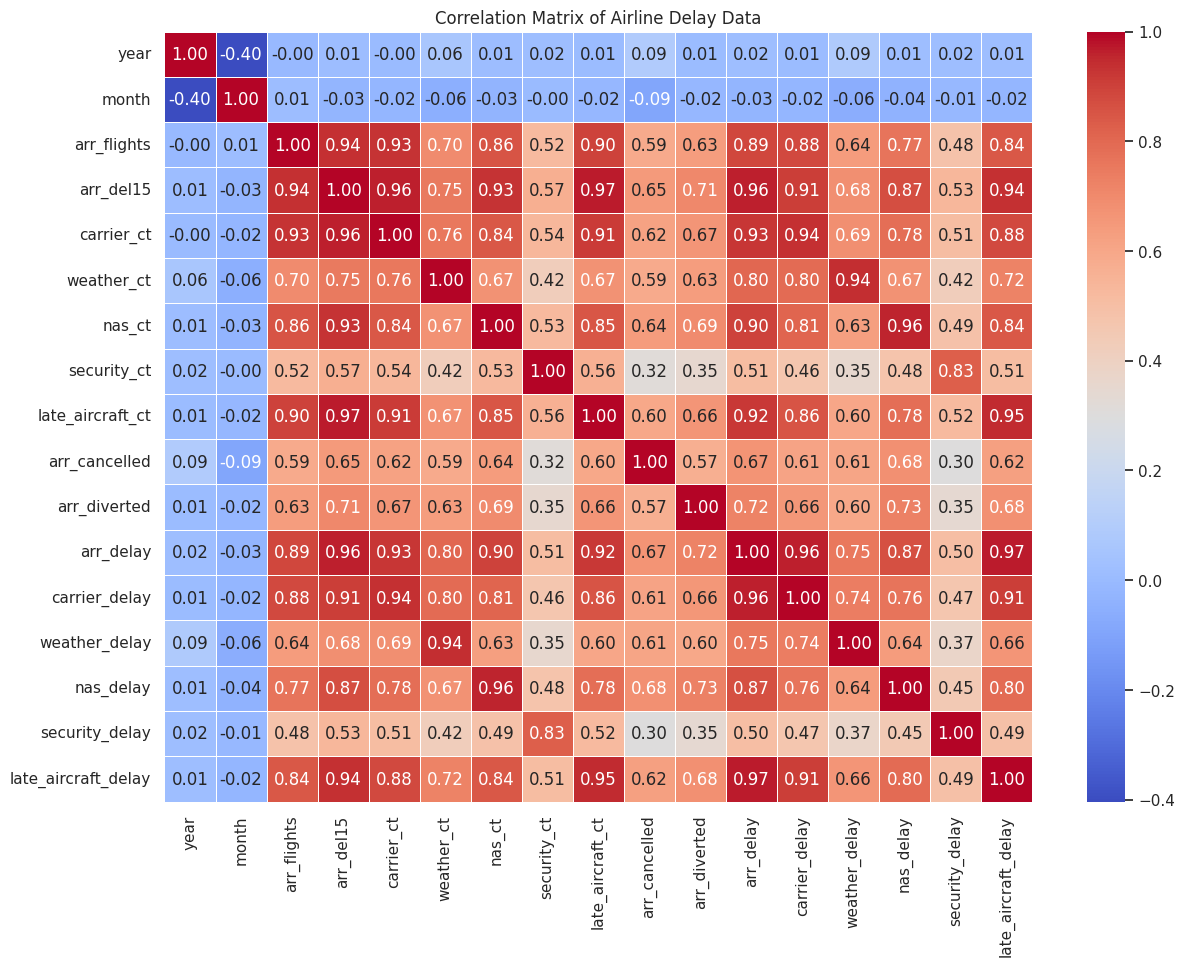

In [ ]:
# Correlation matrix of the numerical data
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Airline Delay Data')
plt.show()


In [ ]:
# Identifying highly correlated pairs
correlated_features = set()
correlation_matrix_abs = correlation_matrix.abs()  # Take absolute value to consider both positive and negative correlations

# Threshold for high correlation
threshold = 0.8

# Iterate over the correlation matrix
for i in range(len(correlation_matrix_abs.columns)):
    for j in range(i):
        if correlation_matrix_abs.iloc[i, j] >= threshold:
            col_name = (correlation_matrix_abs.columns[i], correlation_matrix_abs.columns[j])
            correlated_features.add(col_name)

correlated_features


{('arr_del15', 'arr_flights'),
 ('arr_delay', 'arr_del15'),
 ('arr_delay', 'arr_flights'),
 ('arr_delay', 'carrier_ct'),
 ('arr_delay', 'late_aircraft_ct'),
 ('arr_delay', 'nas_ct'),
 ('arr_delay', 'weather_ct'),
 ('carrier_ct', 'arr_del15'),
 ('carrier_ct', 'arr_flights'),
 ('carrier_delay', 'arr_del15'),
 ('carrier_delay', 'arr_delay'),
 ('carrier_delay', 'arr_flights'),
 ('carrier_delay', 'carrier_ct'),
 ('carrier_delay', 'late_aircraft_ct'),
 ('carrier_delay', 'nas_ct'),
 ('late_aircraft_ct', 'arr_del15'),
 ('late_aircraft_ct', 'arr_flights'),
 ('late_aircraft_ct', 'carrier_ct'),
 ('late_aircraft_ct', 'nas_ct'),
 ('late_aircraft_delay', 'arr_del15'),
 ('late_aircraft_delay', 'arr_delay'),
 ('late_aircraft_delay', 'arr_flights'),
 ('late_aircraft_delay', 'carrier_ct'),
 ('late_aircraft_delay', 'carrier_delay'),
 ('late_aircraft_delay', 'late_aircraft_ct'),
 ('late_aircraft_delay', 'nas_ct'),
 ('nas_ct', 'arr_del15'),
 ('nas_ct', 'arr_flights'),
 ('nas_ct', 'carrier_ct'),
 ('nas_dela

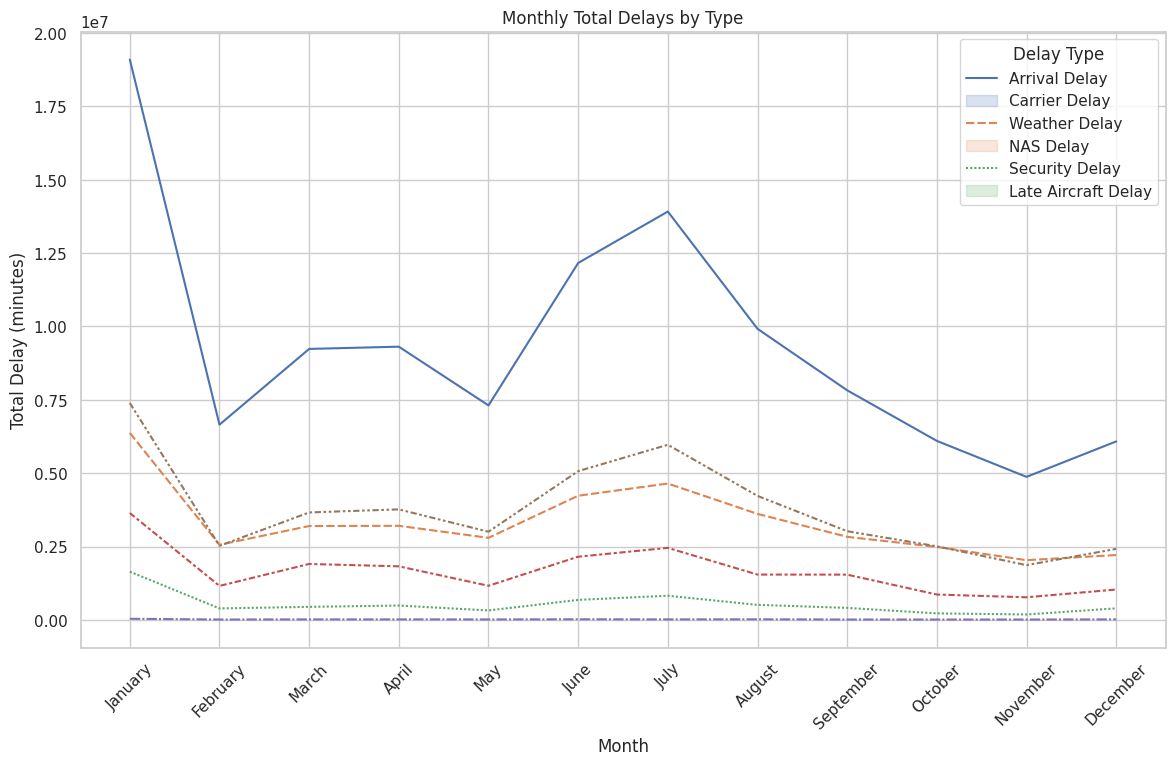

In [ ]:
import calendar

monthly_delays = data.groupby('month')[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Mapping month numbers to month names
monthly_delays.index = monthly_delays.index.map(lambda x: calendar.month_name[x])

# Plotting monthly total delays for each delay type with month names
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_delays)
plt.title('Monthly Total Delays by Type')
plt.xlabel('Month')
plt.ylabel('Total Delay (minutes)')
plt.legend(title='Delay Type', labels=['Arrival Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'])
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(True)
plt.show()
